In [82]:
# Dataframe
import pandas as pd

# Array
import numpy as np
import itertools

# Decompress the file
import gzip

# Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import matplotlib.colors as colors
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS



# text preprocessing
#import spacy
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize, regexp_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize.toktok import ToktokTokenizer
#import gensim
import re


import unicodedata
tokenizer = ToktokTokenizer()
#nlp = spacy.load('en', parse=True, tag=True, entity=True)

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from gensim.models import Word2Vec
from sklearn.dummy import DummyClassifier

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')


In [83]:
df=pd.read_csv('C:/Users/Dell/JupyterPythoncodes/FinalProject/cleaned_health_reviews.csv')

In [84]:
df

,Review_Text,Rating,rating_class,clean_text,clues
0,I have mixed feelings about my experience.,4,Positive,mixed feeling experience,"['mixed', 'feeling', 'experience']"
1,The staff was caring and attentive. I couldn't...,5,Positive,staff care attentive could not happy,"['staff', 'care', 'attentive', 'could', 'not',..."
2,I have mixed feelings about my experience.,5,Positive,mixed feeling experience,"['mixed', 'feeling', 'experience']"
3,I have mixed feelings about my experience.,5,Positive,mixed feeling experience,"['mixed', 'feeling', 'experience']"
4,The healthcare provider was excellent. I had a...,3,Neutral,healthcare provider excellent great experience,"['healthcare', 'provider', 'excellent', 'great..."
...,...,...,...,...,...
995,My experience was terrible. I would not recomm...,5,Positive,experience terrible would not recommend provider,"['experience', 'terrible', 'would', 'not', 're..."
996,The service was disappointing. I won't be comi...,4,Positive,service disappointing not come back,"['service', 'disappointing', 'not', 'come', 'b..."
997,"The service was okay, but nothing exceptional.",3,Neutral,service okay nothing exceptional,"['service', 'okay', 'nothing', 'exceptional']"
998,I have mixed feelings about my experience.,5,Positive,mixed feeling experience,"['mixed', 'feeling', 'experience']"


In [85]:
# Print the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Review_Text   1000 non-null   object
 1   Rating        1000 non-null   int64 
 2   rating_class  1000 non-null   object
 3   clean_text    1000 non-null   object
 4   clues         1000 non-null   object
dtypes: int64(1), object(4)
memory usage: 39.2+ KB


In [86]:
# Customer totals for each rating class
df.rating_class.value_counts()

rating_class
Positive    434
Negative    398
Neutral     168
Name: count, dtype: int64

In [87]:
rating_class_list=[]

for i in df['rating_class']:
    if i=='Negative':
        rating_class_list.append(0)
    
    else:
        rating_class_list.append(1)
        


In [88]:
print(rating_class_list)

[1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 

In [89]:
df['rating_class']=rating_class_list

In [90]:
df['rating_class'].value_counts()


rating_class
1    602
0    398
Name: count, dtype: int64

In [91]:
# Splitting the Data Set into Train and Test Sets
X = df['clean_text']
y = df['rating_class']

X.shape

(1000,)

In [92]:
# Split Dataset into train and test set

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.20,random_state=42,stratify=y)

In [93]:
# Print train and test set shape
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(800,)
Test Set Shape		:(200,)


In [94]:
# # Create the word vector with CountVectorizer
# #count_vect = CountVectorizer(ngram_range=(1,1),min_df=0.0005)
# count_vect = CountVectorizer(ngram_range=(1,1))
# count_vect_train = count_vect.fit_transform(X_train)
# count_vect_train = count_vect_train.toarray()
# count_vect_test = count_vect.transform(X_test)
# count_vect_test = count_vect_test.toarray()

# Convert text to numerical data using CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
features = vectorizer.fit_transform(df['clean_text'])
    

In [95]:
# Let's assume 'rating' is binary where 1 might represent positive and 0 negative
X_train, X_test, y_train, y_test = train_test_split(features, df['rating_class'], test_size=0.20, random_state=42)

In [96]:
# Create a Logistic Regression classifier
model = LogisticRegression(multi_class = 'auto', 
                            solver = 'liblinear',
                             n_jobs=-1, 
                             class_weight = 'balanced',
                             random_state = 42)  # Increased max_iter for convergence
model.fit(Xtrain, y_train)



LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=42,
                   solver='liblinear')

In [97]:
from sklearn.metrics import accuracy_score, classification_report
Xtest = count_vect_test
# Predict the labels for test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.54
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.49      0.45        77
           1       0.64      0.57      0.60       123

    accuracy                           0.54       200
   macro avg       0.53      0.53      0.53       200
weighted avg       0.56      0.54      0.55       200



In [98]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.summer):
    """
    Create a confusion matrix plot for 'good' and 'bad' rating values 
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title, fontsize = 20)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize = 20)
    plt.yticks(tick_marks, classes, fontsize = 20)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment = "center", 
                 color = "white" if cm[i, j] < thresh else "black", fontsize = 40)
    
    sns.set_style({'xtick.bottom': True}, {'ytick.left': True})
    
    plt.tight_layout()
    plt.ylabel('True Label', fontsize = 30)
    plt.xlabel('Predicted Label', fontsize = 30)

    return plt

In [99]:
def disp_confusion_matrix(y_pred, model_name, vector = 'CounterVectorizing'):
    """
    Display confusion matrix for selected model with countVectorizer
    """
    cm = confusion_matrix(y_test, y_pred)
    fig = plt.figure(figsize=(10, 10))
    
    plot = plot_confusion_matrix(cm, classes=['Bad','Good'], normalize=False, 
                                 title = model_name + " " + 'with' + " " + vector + " "+ '\nConfusion Matrix')
    
    
    
    plt.show()

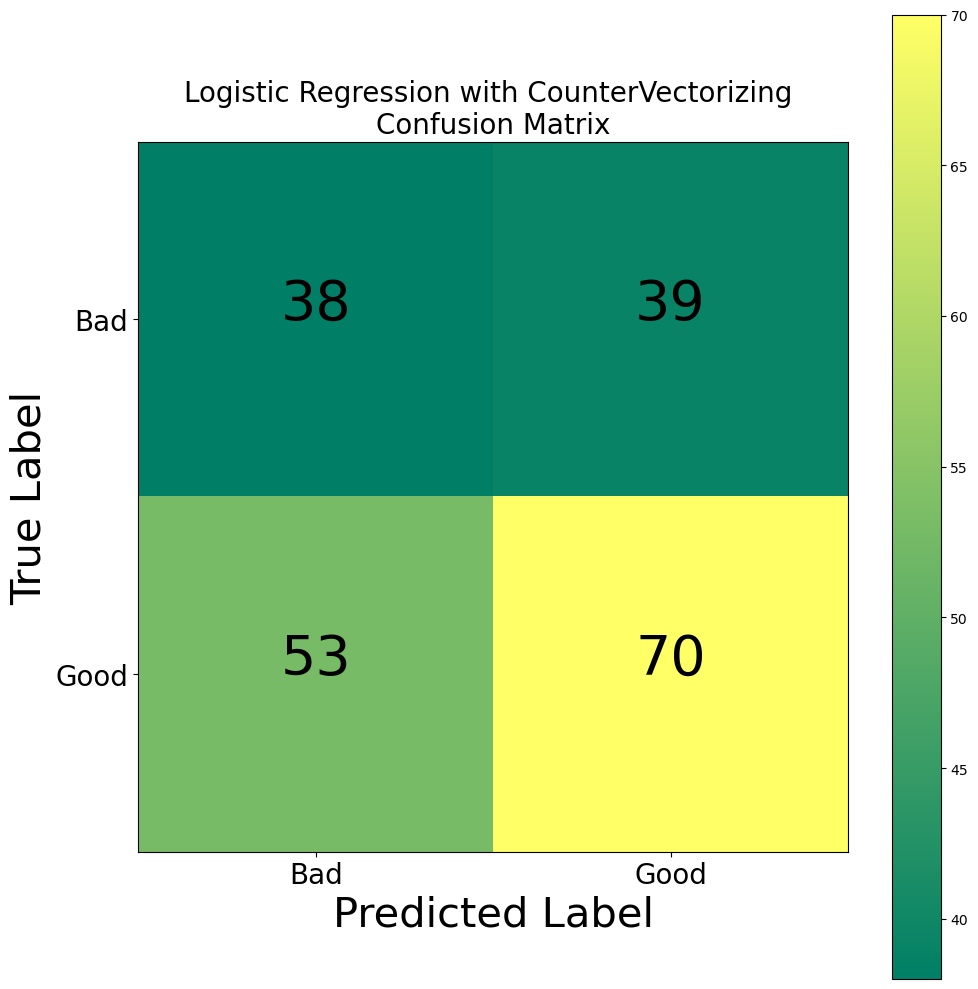

In [104]:
# Print confusion matrix for logistic regression with countvectorizer
disp_confusion_matrix(y_pred, "Logistic Regression")

In [105]:
from joblib import dump

# Save the model and the vectorizer to disk
dump(model, 'logistic_regression_health_model.joblib')
dump(vectorizer, 'count_vectorizer.joblib')

['count_vectorizer.joblib']